In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
colnames=['lettr', 'x-box', 'y-box', 'width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'] 
print(len(colnames))

17


In [4]:
df_Train=pd.read_csv('/content/drive/MyDrive/train.csv',sep=",",names=colnames, header=None)
df_Test=pd.read_csv('/content/drive/MyDrive/test.csv',sep=",",names=colnames, header=None)

In [5]:
df_Train.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
df_Train.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020187,7.028937,5.117312,5.365875,3.500125,6.892625,7.512437,4.627313,5.170375,8.286625,6.471250,7.927125,3.048750,8.343937,3.682000,7.796250
std,1.908503,3.303923,2.003260,2.262621,2.192271,2.029527,2.333867,2.711573,2.384864,2.485706,2.642061,2.071976,2.342481,1.550055,2.571389,1.603402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [7]:
df_Test.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,4.037000,7.061750,5.140000,5.398750,3.528750,6.91750,7.452500,4.63375,5.211750,8.26375,6.385000,7.936500,3.035500,8.318500,3.730750,7.82100
std,1.932114,3.307366,2.059359,2.256551,2.183315,2.01214,2.290645,2.65337,2.364595,2.49975,2.585816,2.115085,2.292609,1.533345,2.549682,1.67262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,2.000000,0.000000,1.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.00000,6.000000,3.00000,4.000000,7.00000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.00000,7.000000,4.00000,5.000000,7.00000,6.000000,8.000000,3.000000,8.000000,4.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.00000,8.000000,6.00000,7.000000,10.00000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,14.000000,15.000000,14.000000,14.000000,15.000000,15.00000,15.000000,15.00000,15.000000,15.00000,15.000000,15.000000,15.000000,14.000000,15.000000,15.00000


In [8]:
#!pip install pandas-profiling==3.4.0
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)

In [9]:
#profile.to_file(output_file="pandas_profiling1.html")

In [10]:
df_Train['lettr'].value_counts()

M    648
T    645
U    645
Y    641
D    638
P    635
A    633
B    630
X    628
V    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: lettr, dtype: int64

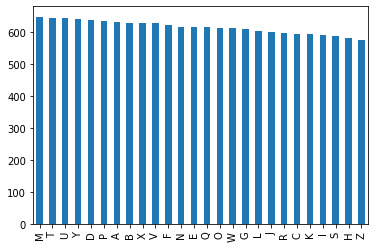

In [11]:
df_Train['lettr'].value_counts().plot(kind='bar')

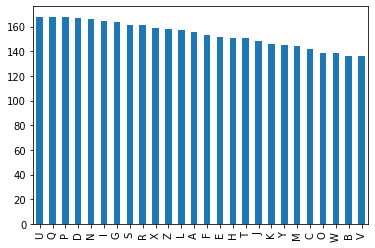

In [12]:
df_Test['lettr'].value_counts().plot(kind='bar')

In [13]:
df_Test['lettr'].value_counts()

U    168
Q    168
P    168
D    167
N    166
I    165
G    164
S    161
R    161
X    159
Z    158
L    157
A    156
F    153
E    152
H    151
T    151
J    148
K    146
Y    145
M    144
C    142
O    139
W    139
B    136
V    136
Name: lettr, dtype: int64

In [14]:
df_Train.shape

(16000, 17)

In [15]:
df_Test.shape

(4000, 17)

In [16]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   16000 non-null  object
 1   x-box   16000 non-null  int64 
 2   y-box   16000 non-null  int64 
 3   width   16000 non-null  int64 
 4   high    16000 non-null  int64 
 5   onpix   16000 non-null  int64 
 6   x-bar   16000 non-null  int64 
 7   y-bar   16000 non-null  int64 
 8   x2bar   16000 non-null  int64 
 9   y2bar   16000 non-null  int64 
 10  xybar   16000 non-null  int64 
 11  x2ybr   16000 non-null  int64 
 12  xy2br   16000 non-null  int64 
 13  x-ege   16000 non-null  int64 
 14  xegvy   16000 non-null  int64 
 15  y-ege   16000 non-null  int64 
 16  yegvx   16000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.1+ MB


In [17]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   4000 non-null   object
 1   x-box   4000 non-null   int64 
 2   y-box   4000 non-null   int64 
 3   width   4000 non-null   int64 
 4   high    4000 non-null   int64 
 5   onpix   4000 non-null   int64 
 6   x-bar   4000 non-null   int64 
 7   y-bar   4000 non-null   int64 
 8   x2bar   4000 non-null   int64 
 9   y2bar   4000 non-null   int64 
 10  xybar   4000 non-null   int64 
 11  x2ybr   4000 non-null   int64 
 12  xy2br   4000 non-null   int64 
 13  x-ege   4000 non-null   int64 
 14  xegvy   4000 non-null   int64 
 15  y-ege   4000 non-null   int64 
 16  yegvx   4000 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 531.4+ KB


In [18]:
df_Train.isnull().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [19]:
df_Test.isnull().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [20]:
y_Train = df_Train['lettr']
y_Train.head()

0    T
1    I
2    D
3    N
4    G
Name: lettr, dtype: object

In [21]:
y_Test = df_Test['lettr']
y_Test.head()

0    U
1    N
2    V
3    I
4    N
Name: lettr, dtype: object

In [22]:
df_Train.drop(['lettr'],axis=1,inplace = True)
df_Test.drop(['lettr'],axis=1,inplace = True)

In [23]:
print(df_Train.shape)
print(df_Test.shape)

(16000, 16)
(4000, 16)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_Train, y_Train, test_size=0.2, random_state=0)
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
print(cv_X_train.shape)
print(cv_X_test.shape)
print(cv_y_train.shape)
print(cv_y_test.shape)
print(X_test.shape)
print(y_test.shape)

(10240, 16)
(2560, 16)
(10240,)
(2560,)
(3200, 16)
(3200,)


In [26]:
from sklearn.preprocessing import LabelEncoder
Label_enc = LabelEncoder()

Label_enc.fit(y_Train)
y_Train = Label_enc.transform(y_Train)
y_train = Label_enc.transform(y_train)
y_test = Label_enc.transform(y_test)
cv_y_train = Label_enc.transform(cv_y_train)
cv_y_test = Label_enc.transform(cv_y_test)
y_Test = Label_enc.transform(y_Test) 

In [27]:
print(y_Test)

[20 13 21 ... 19 18  0]


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_Train)

X_Train_mm = scaler.transform(df_Train)
X_train_mm = scaler.transform(X_train)
X_test_mm = scaler.transform(X_test)
cv_X_train_mm = scaler.transform(cv_X_train)
cv_X_test_mm = scaler.transform(cv_X_test)
X_Test_mm = scaler.transform(df_Test)

In [29]:
print(X_train_mm[0])

[0.53333333 0.8        0.66666667 0.46666667 0.33333333 0.6
 0.26666667 0.2        0.13333333 0.66666667 0.13333333 0.6
 0.66666667 0.06666667 0.06666667 0.5       ]


In [30]:
print(type(X_train_mm[0]))

<class 'numpy.ndarray'>


In [31]:
from sklearn.neural_network import MLPClassifier
nnmodel = MLPClassifier(random_state=0)

nnmodel.fit(cv_X_train_mm,cv_y_train)
y_pred=nnmodel.predict(cv_X_test_mm)
print(classification_report(y_pred,cv_y_test))
cm=confusion_matrix(y_pred,cv_y_test)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        98
           1       0.88      0.66      0.75       143
           2       0.84      0.94      0.89        71
           3       0.81      0.85      0.83       113
           4       0.86      0.88      0.87        96
           5       0.85      0.85      0.85       110
           6       0.70      0.68      0.69        77
           7       0.70      0.76      0.73        84
           8       0.85      0.93      0.89        83
           9       0.84      0.88      0.86       101
          10       0.81      0.80      0.81       102
          11       0.86      0.87      0.87        93
          12       0.90      0.94      0.92        97
          13       0.94      0.91      0.93       112
          14       0.79      0.71      0.75        93
          15       0.92      0.89      0.91       118
          16       0.72      0.85      0.78        86
          17       0.69    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(df_Train)

X_Train_sc = scaler1.transform(df_Train)
X_train_sc = scaler1.transform(X_train)
X_test_sc = scaler1.transform(X_test)
cv_X_train_sc = scaler1.transform(cv_X_train)
cv_X_test_sc = scaler1.transform(cv_X_test)
X_Test_sc = scaler1.transform(df_Test)

In [33]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'hidden_layer_sizes': [(100,),(100,10),(100,20),(100,30),(250,300)],'activation': ['tanh', 'relu','logistic'],'solver': ['sgd', 'adam','lbfgs'],'alpha': 10.0 ** -np.arange(1, 5),'learning_rate': ['constant','adaptive']}
#clf = GridSearchCV(MLPClassifier(),param_grid = parameters, scoring = 'accuracy',cv = 5, n_jobs=-1)
#clf.fit(cv_X_train_mm,cv_y_train)


In [34]:
#print("Tuned Hyperparameters :", clf.best_params_)
#print("Accuracy :",clf.best_score_)

In [35]:
MPL1 = MLPClassifier(activation= 'tanh', alpha = 0.1, hidden_layer_sizes = (100,), learning_rate = 'constant', solver = 'lbfgs')

In [36]:
MPL1.fit(cv_X_train_mm,cv_y_train)
y_pred=nnmodel.predict(cv_X_test_mm)
print(classification_report(y_pred,cv_y_test))
cm=confusion_matrix(y_pred,cv_y_test)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        98
           1       0.88      0.66      0.75       143
           2       0.84      0.94      0.89        71
           3       0.81      0.85      0.83       113
           4       0.86      0.88      0.87        96
           5       0.85      0.85      0.85       110
           6       0.70      0.68      0.69        77
           7       0.70      0.76      0.73        84
           8       0.85      0.93      0.89        83
           9       0.84      0.88      0.86       101
          10       0.81      0.80      0.81       102
          11       0.86      0.87      0.87        93
          12       0.90      0.94      0.92        97
          13       0.94      0.91      0.93       112
          14       0.79      0.71      0.75        93
          15       0.92      0.89      0.91       118
          16       0.72      0.85      0.78        86
          17       0.69    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [37]:
from sklearn.neural_network import MLPClassifier
nnmodel = MLPClassifier(random_state=0)

nnmodel.fit(cv_X_train_sc,cv_y_train)
y_pred=nnmodel.predict(cv_X_test_sc)
print(classification_report(y_pred,cv_y_test))
cm=confusion_matrix(y_pred,cv_y_test)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        97
           1       0.93      0.89      0.91       111
           2       1.00      0.98      0.99        82
           3       0.97      0.94      0.95       121
           4       0.90      0.98      0.94        90
           5       0.92      0.92      0.92       110
           6       0.86      0.83      0.85        77
           7       0.86      0.91      0.88        86
           8       0.95      0.93      0.94        92
           9       0.92      0.96      0.94       102
          10       0.94      0.87      0.90       109
          11       0.96      0.98      0.97        92
          12       0.98      0.99      0.99       100
          13       0.99      0.97      0.98       110
          14       0.90      0.96      0.93        79
          15       0.95      0.95      0.95       114
          16       0.98      0.93      0.95       107
          17       0.88    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
predicted_class=nnmodel.predict(X_Test_sc)
print(classification_report(predicted_class,y_Test))
cm=confusion_matrix(predicted_class,y_Test)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.96      0.90      0.93       144
           2       0.94      0.96      0.95       139
           3       0.94      0.92      0.93       171
           4       0.91      0.97      0.94       143
           5       0.92      0.92      0.92       153
           6       0.91      0.90      0.91       167
           7       0.87      0.89      0.88       148
           8       0.95      0.93      0.94       167
           9       0.93      0.94      0.93       146
          10       0.95      0.90      0.92       154
          11       0.94      0.95      0.95       154
          12       0.98      0.93      0.96       151
          13       0.93      0.93      0.93       165
          14       0.92      0.95      0.93       135
          15       0.94      0.93      0.94       169
          16       0.96      0.94      0.95       172
          17       0.90    

In [39]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'hidden_layer_sizes': [(100,),(100,3),(250,300)],'activation': ['tanh', 'relu','logistic'],'solver': ['sgd', 'adam','lbfgs'],'alpha': 10.0 ** -np.arange(1, 9),'learning_rate': ['constant','adaptive']}
#clf = GridSearchCV(MLPClassifier(),param_grid = parameters, scoring = 'accuracy',cv = 5, n_jobs=-1)
#clf.fit(cv_X_train_sc,cv_y_train)

In [40]:
#print("Tuned Hyperparameters :", clf.best_params_)
#print("Accuracy :",clf.best_score_)

In [41]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=100)
dt.fit(cv_X_train_sc,cv_y_train)
y_pred=dt.predict(cv_X_test_sc)
print(classification_report(y_pred,cv_y_test))
cm=confusion_matrix(y_pred,cv_y_test)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        96
           1       0.93      0.86      0.90       116
           2       0.96      0.97      0.97        79
           3       0.97      0.94      0.96       122
           4       0.93      0.93      0.93        98
           5       0.93      0.93      0.93       110
           6       0.93      0.91      0.92        76
           7       0.92      0.93      0.93        90
           8       0.93      0.99      0.96        86
           9       0.94      0.95      0.95       105
          10       0.94      0.90      0.92       106
          11       0.95      0.98      0.96        91
          12       0.96      0.95      0.96       102
          13       0.97      1.00      0.99       105
          14       0.93      0.95      0.94        82
          15       0.95      0.96      0.96       112
          16       0.96      0.92      0.94       106
          17       0.95    

In [42]:
#from sklearn.model_selection import GridSearchCV
#parameters = [{'n_estimaters;:[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400] ,'criterion':['gini','entropy'],'bootstrap': False}]
#grid_search = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
#grid_search.fit(cv_X_train_sc,cv_y_train)

In [43]:
#print("Tuned Hyperparameters :", grid_search.best_params_)
#print("Accuracy :",grid_search.best_score_)

In [44]:
predicted_class=dt.predict(X_Test_sc)
print(classification_report(predicted_class,y_Test))
cm=confusion_matrix(predicted_class,y_Test)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       0.97      0.87      0.92       151
           2       0.96      0.98      0.97       139
           3       0.98      0.90      0.93       182
           4       0.96      0.95      0.95       154
           5       0.93      0.93      0.93       153
           6       0.96      0.93      0.94       169
           7       0.85      0.93      0.89       138
           8       0.93      0.96      0.94       159
           9       0.95      0.97      0.96       144
          10       0.91      0.92      0.92       144
          11       0.96      0.97      0.97       155
          12       0.97      0.96      0.97       146
          13       0.93      0.98      0.96       158
          14       0.95      0.92      0.94       143
          15       0.93      0.94      0.94       167
          16       0.96      0.94      0.95       173
          17       0.96    

In [45]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=100)
dt.fit(X_Train_sc,y_Train)
y_pred=dt.predict(X_Test_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       0.98      0.89      0.93       150
           2       0.96      0.99      0.97       137
           3       0.99      0.93      0.96       178
           4       0.97      0.92      0.95       159
           5       0.95      0.96      0.96       152
           6       0.98      0.98      0.98       163
           7       0.89      0.95      0.92       141
           8       0.95      0.96      0.95       162
           9       0.95      0.96      0.96       147
          10       0.94      0.95      0.94       144
          11       0.97      0.99      0.98       155
          12       0.99      0.96      0.98       149
          13       0.92      0.98      0.95       156
          14       0.96      0.94      0.95       143
          15       0.94      0.97      0.95       163
          16       0.96      0.96      0.96       168
          17       0.98    

In [46]:
nnmodel1 = MLPClassifier()
nnmodel1.fit(X_Train_sc,y_Train)
y_pred=nnmodel1.predict(X_Test_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       157
           1       0.95      0.91      0.93       141
           2       0.96      0.98      0.97       139
           3       0.96      0.93      0.94       174
           4       0.97      0.95      0.96       155
           5       0.97      0.90      0.93       165
           6       0.95      0.97      0.96       159
           7       0.88      0.96      0.92       139
           8       0.95      0.96      0.95       163
           9       0.94      0.91      0.93       152
          10       0.96      0.96      0.96       146
          11       0.93      0.97      0.95       150
          12       0.99      0.95      0.97       149
          13       0.94      0.98      0.96       159
          14       0.94      0.96      0.95       135
          15       0.92      0.96      0.94       161
          16       0.96      0.98      0.97       166
          17       0.97    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
#X_Train_mm = scaler.transform(df_Train)
#X_train_mm = scaler.transform(X_train)
#X_test_mm = scaler.transform(X_test)
#cv_X_train_mm = scaler.transform(cv_X_train)
#cv_X_test_mm = scaler.transform(cv_X_test)
#X_Test_mm = scaler.transform(df_Test)

colnames1 = colnames[1:]
print(colnames1)
df_Train_mm = pd.DataFrame(X_Train_mm, columns = colnames1)
df_Test_mm = pd.DataFrame(X_Test_mm, columns = colnames1)
df_X_train_mm = pd.DataFrame(X_train_mm, columns = colnames1)
df_cv_X_train_mm = pd.DataFrame(cv_X_train_mm, columns = colnames1)
df_cv_X_test_mm = pd.DataFrame(cv_X_test_mm, columns = colnames1)
df_X_test_mm = pd.DataFrame(X_test_mm, columns = colnames1)

['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']


In [48]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(df_Train_mm)

X_Train_mm_sc = scaler2.transform(df_Train_mm)
X_train_mm_sc = scaler2.transform(df_X_train_mm)
X_test_mm_sc = scaler2.transform(df_X_test_mm)
cv_X_train_mm_sc = scaler2.transform(df_cv_X_train_mm)
cv_X_test_mm_sc = scaler2.transform(df_cv_X_test_mm)
X_Test_mm_sc = scaler2.transform(df_Test_mm)

In [49]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=100)
dt.fit(X_Train_mm_sc,y_Train)
y_pred=dt.predict(X_Test_mm_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(dt, X_Train_mm_sc, y_Train, cv=cv1)
print ('Cross validation', scores)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       0.98      0.89      0.93       150
           2       0.96      0.99      0.98       139
           3       0.99      0.94      0.96       176
           4       0.97      0.93      0.95       159
           5       0.96      0.96      0.96       153
           6       0.97      0.97      0.97       164
           7       0.87      0.93      0.90       142
           8       0.95      0.97      0.96       161
           9       0.95      0.95      0.95       148
          10       0.91      0.94      0.93       141
          11       0.94      0.99      0.97       149
          12       0.99      0.96      0.98       149
          13       0.92      0.98      0.95       156
          14       0.96      0.93      0.95       144
          15       0.95      0.96      0.96       167
          16       0.96      0.95      0.96       169
          17       0.97    

In [50]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
nnmodel2 = MLPClassifier()
nnmodel2.fit(X_Train_mm_sc,y_Train)
y_pred=nnmodel2.predict(X_Test_mm_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(nnmodel2, X_Train_mm_sc, y_Train, cv=cv1)
print ('Cross validation', scores)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.94      0.90      0.92       142
           2       0.96      0.95      0.95       143
           3       0.95      0.95      0.95       166
           4       0.92      0.93      0.92       151
           5       0.96      0.89      0.92       166
           6       0.95      0.91      0.93       171
           7       0.87      0.90      0.89       145
           8       0.94      0.93      0.94       166
           9       0.95      0.95      0.95       148
          10       0.97      0.92      0.94       153
          11       0.94      0.98      0.96       150
          12       0.99      0.97      0.98       146
          13       0.95      0.97      0.96       163
          14       0.92      0.96      0.94       133
          15       0.92      0.95      0.93       164
          16       0.96      0.97      0.96       166
          17       0.91    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross validation [0.939375  0.9446875 0.9415625 0.95      0.9428125]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
# from sklearn.metrics import plot_confusion_matrix
# print(y_Train)
# plot_confusion_matrix(nnmodel2, X_Test_mm_sc,y_Test)

In [52]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'hidden_layer_sizes': [(100,),(100,10),(100,20),(100,30)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam','lbfgs'],'alpha': 10.0 ** -np.arange(1, 10),'learning_rate': ['constant','adaptive']}
#clf = GridSearchCV(MLPClassifier(),param_grid = parameters, scoring = 'accuracy',cv = 5, n_jobs=-1)
#clf.fit(cv_X_train_mm_sc,cv_y_train)


In [53]:
#print("Tuned Hyperparameters :", clf.best_params_)
#print("Accuracy :",clf.best_score_)

In [54]:
nnmodel3 = MLPClassifier(hidden_layer_sizes=(250,300),activation='logistic')
nnmodel3.fit(X_Train_mm_sc,y_Train)
y_pred=nnmodel3.predict(X_Test_mm_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(nnmodel2, X_Train_mm_sc, y_Train, cv=cv1)
print ('Cross validation', scores)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       154
           1       0.99      0.93      0.96       144
           2       0.99      0.99      0.99       141
           3       0.99      0.96      0.98       171
           4       0.97      0.99      0.98       149
           5       0.98      0.95      0.96       158
           6       0.96      0.98      0.97       162
           7       0.95      0.96      0.96       150
           8       0.95      0.99      0.97       158
           9       0.98      0.97      0.97       150
          10       0.97      0.98      0.97       144
          11       0.96      0.99      0.97       153
          12       1.00      0.99      1.00       145
          13       0.98      0.99      0.98       164
          14       0.94      0.98      0.96       134
          15       0.97      0.96      0.97       169
          16       0.97      0.96      0.97       169
          17       0.98    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross validation [0.9396875 0.946875  0.9490625 0.9471875 0.9440625]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(bootstrap= False,n_estimators=1400)
dt.fit(X_Train_mm_sc,y_Train)
y_pred=dt.predict(X_Test_mm_sc)
print(classification_report(y_pred,y_Test))
cm=confusion_matrix(y_pred,y_Test)
print(cm)
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(dt, X_Train_mm_sc, y_Train, cv=cv1)
print ('Cross validation', scores)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       0.99      0.91      0.94       148
           2       0.97      0.99      0.98       139
           3       0.99      0.94      0.97       176
           4       0.97      0.97      0.97       152
           5       0.96      0.97      0.97       151
           6       0.98      0.98      0.98       164
           7       0.89      0.96      0.92       140
           8       0.96      0.96      0.96       164
           9       0.96      0.97      0.96       147
          10       0.92      0.94      0.93       143
          11       0.97      0.99      0.98       154
          12       1.00      0.97      0.99       148
          13       0.93      0.98      0.95       157
          14       0.98      0.94      0.96       144
          15       0.96      0.96      0.96       167
          16       0.96      0.97      0.97       167
          17       0.98    

In [56]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [64]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Normalization(axis=None),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(26,activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    X_Train_mm_sc,
    y_Train,
    epochs=100
)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 2s 3ms/step - loss: 1.2541 - sparse_categorical_accuracy: 0.6528
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.5701 - sparse_categorical_accuracy: 0.8316
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4104 - sparse_categorical_accuracy: 0.8773
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3223 - sparse_categorical_accuracy: 0.9039
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.2627 - sparse_categorical_accuracy: 0.9186
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9316
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1907 - sparse_categorical_accuracy: 0.9406
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1669 - sparse_categorical_accuracy: 0.9486
Epoch 9/100
500/500 [==============================]

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (32, 128)                 2176      
                                                                 
 dense_7 (Dense)             (32, 128)                 16512     
                                                                 
 dense_8 (Dense)             (32, 26)                  3354      
                                                                 
Total params: 22,042
Trainable params: 22,042
Non-trainable params: 0
_________________________________________________________________


In [66]:
for layer in model.layers:
  weights = layer.get_weights()
  #print(weights)

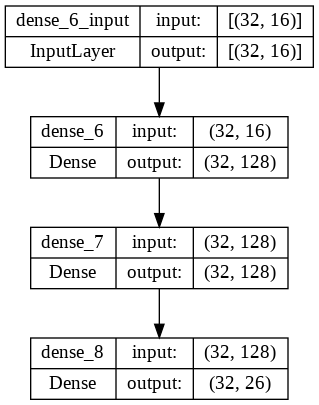

In [67]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True,)

In [68]:
score = model.evaluate(X_Test_mm_sc, y_Test,verbose=1)
print(score)

125/125 [==============================] - 0s 2ms/step - loss: 0.1460 - sparse_categorical_accuracy: 0.9697
[0.1459594964981079, 0.9697499871253967]
